In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [69]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [70]:
pd.set_option("display.max_columns", None)

# Data Loading

In [71]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/second_scenario_group.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [72]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [73]:
data_initial.head()

,store_id,date,Total_sales,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,TX_1,2011-01-29,1124,58,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,TX_1,2011-01-30,1124,62,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TX_1,2011-01-31,1124,41,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,TX_1,2011-02-01,1124,46,NaN,NaN,NaN,NaN,1,1,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TX_1,2011-02-02,1124,28,NaN,NaN,NaN,NaN,1,0,1,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Event Conversion

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
hot_encoder=OneHotEncoder()

## Event

In [76]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [77]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [79]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [80]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

## Store Id

In [81]:
encoded_store=hot_encoder.fit_transform(data_initial[["store_id"]])
array_store=encoded_store.toarray()

In [82]:
hot_encoder.categories_

[array(['TX_1', 'TX_2', 'TX_3'], dtype=object)]

In [83]:
store_df=pd.DataFrame(array_store, columns=['TX_1', 'TX_2', 'TX_3'])

In [84]:
frames=[data_initial, event_df, store_df]
data=pd.concat(frames, axis=1)

In [85]:
data.drop(["event_type_1", "nan", "Total_sales", "store_id"], axis=1, inplace=True)

In [86]:
data.head()

,date,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
0,2011-01-29,58,0,0,0,5.959714,5.05,4.094626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2011-01-30,62,0,0,0,5.959714,5.05,4.094626,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2011-01-31,41,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2011-02-01,46,1,1,0,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2011-02-02,28,1,0,1,5.959714,5.05,4.094626,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
count,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000
mean,60.678690,0.329326,0.329326,0.329326,6.364913,5.284278,4.713428,0.142708,0.142708,0.143231,0.143231,0.142708,0.142708,0.142708,0.082593,0.088866,0.097229,0.090957,0.081025,0.078411,0.081025,0.081025,0.078411,0.081025,0.078411,0.081025,0.176163,0.191323,0.190800,0.190800,0.190800,0.060115,0.018296,0.026660,0.027182,0.008364,0.333333,0.333333,0.333333
std,18.630619,0.470009,0.470009,0.470009,0.431139,0.298365,0.662430,0.349805,0.349805,0.350338,0.350338,0.349805,0.349805,0.349805,0.275290,0.284575,0.296296,0.287572,0.272897,0.268840,0.272897,0.272897,0.268840,0.272897,0.268840,0.272897,0.380992,0.393377,0.392966,0.392966,0.392966,0.237720,0.134031,0.161101,0.162629,0.091079,0.471446,0.471446,0.471446
min,0.000000,0.000000,0.000000,0.000000,5.446415,4.480000,3.428941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,0.000000,6.039063,4.970000,4.095943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,0.000000,6.398908,5.360000,4.514425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,1.000000,1.000000,1.000000,6.798731,5.480000,5.219345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,183.000000,1.000000,1.000000,1.000000,7.040315,5.825000,5.800847,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Performance Function

In [88]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

# Scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler_feature=MinMaxScaler()
scaler_Sales=MinMaxScaler()

In [91]:
data_scale=data[:]

In [95]:
Sales=pd.DataFrame(scaler_Sales.fit_transform(pd.DataFrame(data_scale["Sales"])))

In [ ]:
data_scale[data_scale.columns[2:]]=scaler_feature.fit_transform(data_scale[data_scale.columns[2:]])

In [92]:
scaler=MinMaxScaler()

In [25]:
data_scale[data_scale.columns[1:]]=scaler.fit_transform(data_scale[data_scale.columns[1:]])

In [26]:
data_scale["date"]=data["date"]

In [27]:
data=data_scale

### Train & Test

In [28]:
import datetime

In [29]:
# train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [30]:
# test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
# test.reset_index(drop=True, inplace=True)

In [31]:
specific_date=data["date"].max()-datetime.timedelta(days=28)
valid_date=specific_date-datetime.timedelta(days=56)

### Dates

In [32]:
data["date"].max()

Timestamp('2016-04-24 00:00:00')

In [33]:
specific_date

Timestamp('2016-03-27 00:00:00')

In [34]:
valid_date

Timestamp('2016-01-31 00:00:00')

In [35]:
train=data[data["date"]<=specific_date]

In [36]:
test=data[data["date"]>specific_date]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [37]:
test=test.drop(["date"], axis=1)
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

In [38]:
X_test

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
0,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.359230,0.297398,0.410982,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.359230,0.297398,0.410982,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,0.0,0.0,0.0,0.639752,0.736059,0.788259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82,0.0,0.0,0.0,0.638488,0.736059,0.787349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X_train_initial, y_train_initial=train.drop(["Sales"], axis=1), train[["Sales", "date"]]

In [40]:
X_train, y_train = X_train_initial[X_train_initial["date"]<=valid_date], y_train_initial[X_train_initial["date"]<=valid_date]
X_valid, y_valid = X_train_initial[X_train_initial["date"]>valid_date], y_train_initial[X_train_initial["date"]>valid_date]

In [41]:
X_train=X_train.drop(["date"], axis=1)
y_train=y_train.drop(["date"], axis=1)
X_valid=X_valid.drop(["date"], axis=1)
y_valid=y_valid.drop(["date"], axis=1)

## Numpy Conversion

## Reshape

In [42]:
X_train_r=X_train.to_numpy().reshape(3, int(X_train.shape[0]/3), X_train.shape[1])
X_valid_r=X_valid.to_numpy().reshape(3, int(X_valid.shape[0]/3), X_valid.shape[1])
X_test_r=X_test.to_numpy().reshape(3, int(X_test.shape[0]/3), X_test.shape[1])

In [43]:
y_train_r=y_train.to_numpy().reshape(3, int(y_train.shape[0]/3), y_train.shape[1])
y_valid_r=y_valid.to_numpy().reshape(3, int(y_valid.shape[0]/3), y_valid.shape[1])
y_test_r=y_test.to_numpy().reshape(3, int(y_test.shape[0]/3), 1)

# Deep Learning

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
tf.__version__

'2.0.0'

In [46]:
keras.__version__

'2.2.4-tf'

# LSTM

In [47]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 38]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 20)          4720      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1)           21        
Total params: 8,021
Trainable params: 8,021
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss=tf.keras.losses.mse,
             optimizer="adam",
             metrics=[tf.keras.metrics.MAPE])

In [50]:
X_valid_r.shape

(3, 56, 38)

In [51]:
early_stopping=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [52]:
obtained_model = model.fit(X_train_r, y_train_r, epochs=100, validation_data=(X_valid_r, y_valid_r),
                           callbacks=[early_stopping])

Train on 3 samples, validate on 3 samples
Epoch 1/100
3/3 [==============================] - 5s 2s/sample - loss: 0.1179 - mean_absolute_percentage_error: 234116.2656 - val_loss: 0.1250 - val_mean_absolute_percentage_error: 78.4561
Epoch 2/100
3/3 [==============================] - 1s 337ms/sample - loss: 0.0839 - mean_absolute_percentage_error: 356869.4688 - val_loss: 0.0998 - val_mean_absolute_percentage_error: 67.4831
Epoch 3/100
3/3 [==============================] - 1s 319ms/sample - loss: 0.0574 - mean_absolute_percentage_error: 498819.7188 - val_loss: 0.0790 - val_mean_absolute_percentage_error: 57.3852
Epoch 4/100
3/3 [==============================] - 1s 330ms/sample - loss: 0.0378 - mean_absolute_percentage_error: 640579.0625 - val_loss: 0.0626 - val_mean_absolute_percentage_error: 49.3347
Epoch 5/100
3/3 [==============================] - 1s 337ms/sample - loss: 0.0248 - mean_absolute_percentage_error: 777915.8750 - val_loss: 0.0503 - val_mean_absolute_percentage_error: 43.2

In [53]:
model.evaluate(X_test_r, y_test_r)

3/1 [==========================================================================================] - 1s 379ms/sample - loss: 0.0390 - mean_absolute_percentage_error: 34.6634


[0.03899835795164108, 34.66339]

## Predictions

In [54]:
lstm_predictions=model.predict(X_test_r)

In [55]:
performance_list("LSTM Performance", lstm_predictions.reshape(84), y_test_r.reshape(84))

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,LSTM Performance,84,0.27814,0.086341,-0.548096,-0.889696,0.908721,0.021547,0.159109,0.572045


## Overfitting Control

### Train

In [56]:
lstm_train_control=model.predict(X_train_r)

In [57]:
performance_list("LSTM Performance Train Control", lstm_train_control.reshape(X_train_r.shape[0]*X_train_r.shape[1]), 
                                                   y_train_r.reshape(X_train_r.shape[0]*X_train_r.shape[1]))

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,LSTM Performance Train Control,5487,0.409284,0.093681,0.198821,0.15042,0.297245,0.001879,0.114518,0.279802


### Validation

In [58]:
lstm_val_control=model.predict(X_valid_r)

In [59]:
performance_list("LSTM Performance Train Control", lstm_val_control.reshape(X_valid_r.shape[0]*X_valid_r.shape[1]), 
                                                   y_valid_r.reshape(X_valid_r.shape[0]*X_valid_r.shape[1]))

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,LSTM Performance Train Control,168,0.338158,0.130815,-0.188399,-0.515449,0.671178,0.013389,0.138233,0.408782


# Feature Extraction

In [63]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [64]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [65]:
on_leaf = estimator.apply(X_train)

In [66]:
X_train_ext=X_train[:]

In [67]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node
0,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29
1,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15
2,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
3,1.0,1.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,1.0,0.0,1.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,0.0,0.0,0.0,0.657490,0.736059,0.794052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34
5651,0.0,0.0,0.0,0.657490,0.736059,0.794052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34
5652,0.0,0.0,0.0,0.657490,0.736059,0.794052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35
5653,0.0,0.0,0.0,0.642821,0.736059,0.787827,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41


### Valid Node Selection

In [69]:
on_leaf_valid = estimator.apply(X_valid)

In [70]:
X_valid_ext=X_valid[:]

In [71]:
X_valid_ext["Node"] = on_leaf_valid.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Test Node Selection

In [72]:
on_leaf_test = estimator.apply(X_test)

In [73]:
X_test_ext=X_test[:]

In [74]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [75]:
Xframes_feature=[X_train_ext, X_valid_ext, X_test_ext]
yframes_feature=[y_train, y_valid, pd.DataFrame(y_test)]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [76]:
concated_df

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales
0,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,0.316940
1,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15,0.338798
2,0.0,0.0,0.0,0.322040,0.423792,0.280654,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,0.224044
3,1.0,1.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,0.251366
4,1.0,0.0,1.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,0.153005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0.322404
80,0.0,0.0,0.0,0.639752,0.736059,0.788259,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0.382514
81,0.0,0.0,0.0,0.639752,0.736059,0.788259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35,0.508197
82,0.0,0.0,0.0,0.638488,0.736059,0.787349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41,0.557377


In [77]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [78]:
concated_df.reset_index(inplace=True, drop=True)

In [79]:
train_new=concated_df.iloc[:len(X_train)]

In [80]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

In [82]:
X_valid_new=concated_df.iloc[-(len(X_test)+len(X_valid)):-len(X_test)].drop(["Sales","Node"], axis=1)

y_valid_new=concated_df.iloc[-(len(X_test)+len(X_valid)):-len(X_test)]["Sales"]

In [83]:
X_test_new=concated_df.iloc[-len(X_test):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[-len(X_test):]["Sales"]

## Numpy Conversion

## Reshape

In [84]:
X_train_new

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,new_feature
0,1.0,1.0,0.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.224044
1,1.0,0.0,1.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.251366
2,1.0,1.0,1.0,0.322040,0.423792,0.280654,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.153005
3,1.0,0.0,0.0,0.322040,0.423792,0.280654,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.311475
4,1.0,1.0,1.0,0.263328,0.371747,0.242788,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.316940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.0,0.0,0.0,0.657490,0.736059,0.794052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.202186
5452,0.0,0.0,0.0,0.657490,0.736059,0.794052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.349727
5453,0.0,0.0,0.0,0.657490,0.736059,0.794052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.480874
5454,0.0,0.0,0.0,0.642821,0.736059,0.787827,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.398907


In [85]:
int(X_train_new.shape[0]/3)

1818

In [86]:
X_train_r_new=X_train_new.to_numpy().reshape(3, int(X_train_new.shape[0]/3), X_train_new.shape[1])
X_valid_r_new=X_valid_new.to_numpy().reshape(3, int(X_valid_new.shape[0]/3), X_valid_new.shape[1])
X_test_r_new=X_test_new.to_numpy().reshape(3, int(X_test_new.shape[0]/3), X_test_new.shape[1])

ValueError: cannot reshape array of size 212784 into shape (3,1818,39)

In [ ]:
y_train_r_new=y_train_new.to_numpy().reshape(3, int(y_train_new.shape[0]/3), y_train_new.shape[1])
y_valid_r_new=y_valid_new.to_numpy().reshape(3, int(y_valid_new.shape[0]/3), y_valid_new.shape[1])
y_test_r_new=y_test_new.to_numpy().reshape(3, int(y_test_new.shape[0]/3), 1)

# Deep Learning with Feature

# LSTM

In [ ]:
model_f = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 38]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

In [ ]:
model_f.summary()

In [ ]:
model_f.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(),
             optimizer="adam",
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
obtained_model = model_f.fit(X_train_r, y_train_r, epochs=100, validation_data=(X_valid_r, y_valid_r),
                           callbacks=[early_stopping])

In [410]:
model.evaluate(X_test_r, y_test_r)

3/1 [==========================================================================================] - 1s 264ms/sample - loss: 91055.2344 - root_mean_squared_error: 0.3817


[91055.234375, 0.38173637]

## Predictions

In [411]:
lstm_predictions=model.predict(X_test_r)

In [412]:
performance_list("LSTM Performance", lstm_predictions.reshape(84), y_test_r.reshape(84))

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,LSTM Performance,84,0.06591,0.058792,-4.932116,4.963308,49.351239,0.041651,0.327767,4.972959


## Overfitting Control

### Train

In [413]:
lstm_train_control=model.predict(X_train_r)

In [414]:
performance_list("LSTM Performance Train Control", lstm_train_control.reshape(X_train_r.shape[0]*X_train_r.shape[1]), 
                                                   y_train_r.reshape(X_train_r.shape[0]*X_train_r.shape[1]))

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,LSTM Performance Train Control,5484,0.049035,0.130852,-5.685488,1.974512,14.579213,0.00419,0.279906,5.708344


### Validation

In [415]:
lstm_val_control=model.predict(X_valid_r)

In [416]:
performance_list("LSTM Performance Train Control", lstm_val_control.reshape(X_valid_r.shape[0]*X_valid_r.shape[1]), 
                                                   y_valid_r.reshape(X_valid_r.shape[0]*X_valid_r.shape[1]))

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,LSTM Performance Train Control,171,0.062824,0.052355,-4.13343,8.68294,28.400345,0.023658,0.260311,4.143485


# General Result Table

In [233]:
pd.options.display.float_format = '{:,.8f}'.format

In [234]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [235]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,28,69.97615991,6.72395888,-0.20653336,-0.19835189,0.24979657,4.16170166,17.82890036,0.25478535
1,Support Vector Regressor Linear Performance,28,74.78468356,9.01593724,-0.12895539,-0.12242888,0.19558951,3.47787136,14.71200039,0.19672478
2,Support Vector Regressor Polynomial Performance,28,68.42819101,6.70428263,-0.23382732,-0.22539992,0.26833506,4.35513001,18.75562247,0.27409204
3,Random Forest Performance,28,77.49817160,9.46071044,-0.08942662,-0.08807310,0.18880245,3.47787839,14.27965289,0.18425793
4,Elastic Net Performance with Feature Extraction,28,73.36811865,9.15347746,-0.15075285,-0.15227485,0.22893639,3.98522512,16.46678832,0.22444065
5,SVR Linear Performance with Feature Extraction,28,75.58232865,9.45777157,-0.11704115,-0.11371807,0.19753562,3.53161990,14.78595444,0.19562714
6,SVR Polynomail Performance with Feature Extrac...,28,72.17876066,12.43404017,-0.16971489,-0.19238932,0.27788415,4.62029274,18.86295932,0.26133670
7,Random Forest Performance with Feature Extraction,28,77.18700000,8.83259313,-0.09381854,-0.08857263,0.17904791,3.36857566,13.71157143,0.17764094


## RFOverfitting

In [236]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,5711,60.58763527,15.70746702,0.00041901,0.01030594,0.07720652,0.07912114,4.45457278,0.07352280


In [237]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,28,77.49817160,9.46071044,-0.08942662,-0.08807310,0.18880245,3.47787839,14.27965289,0.18425793


In [238]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,5680,60.58669108,15.64619490,0.00075089,0.01262720,0.06599686,0.06500346,3.76887407,0.06220630


In [239]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,28,77.18700000,8.83259313,-0.09381854,-0.08857263,0.17904791,3.36857566,13.71157143,0.17764094


# Feature Control

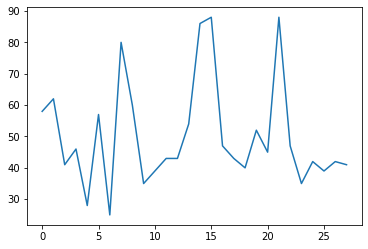

In [240]:
plt.plot(data.Sales[:28])

In [241]:
from statsmodels.graphics.tsaplots import plot_acf

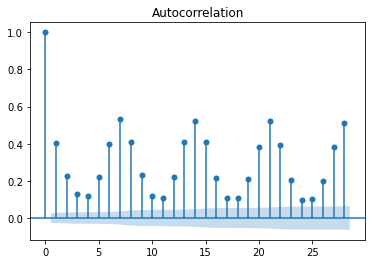

In [242]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [243]:
concated_df.Node.value_counts()

34    1753
8      732
37     522
35     439
41     343
38     261
60     237
9      183
52     150
15     145
6      110
42      99
5       95
45      86
44      70
59      70
28      64
29      52
56      46
21      44
53      43
16      38
57      27
20      26
13      21
12      20
26      17
50      14
49      11
25      11
22      10
Name: Node, dtype: int64

In [244]:
concated_df[concated_df["Node"]==6].head()

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
4038,0,0,0,5.59758242,4.97000000,3.87787695,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,35,nan
4039,0,0,0,5.59758242,4.97000000,3.87787695,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,30,35.00000000
4040,0,0,0,5.59758242,4.97000000,3.87787695,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,36,30.00000000
4041,1,1,0,5.59758242,4.97000000,3.87787695,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,60,36.00000000
4042,1,0,1,5.59758242,4.97000000,3.87787695,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,48,60.00000000


In [245]:
concated_df[concated_df["Node"]==9].head()

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
6,1,0,0,5.95971429,5.05000000,4.09462637,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,25,nan
13,0,1,1,5.86613333,4.98000000,4.00481092,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,54,25.00000000
20,0,0,0,5.86560000,4.98000000,4.00554320,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,45,54.00000000
27,0,0,0,5.86973333,4.98000000,4.00654430,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,41,45.00000000
34,1,0,0,5.88133333,4.98000000,4.00242235,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,9,39,41.00000000


In [246]:
concated_df[concated_df["Node"]==42].head()

,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
2445,0,0,1,6.76478632,5.50000000,5.16015681,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,94,nan
2452,0,0,0,6.76923077,5.50000000,5.15039958,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,59,94.00000000
2466,1,0,0,6.89491667,5.72000000,5.12351278,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,87,59.00000000
2473,0,1,1,6.89491667,5.72000000,5.12351278,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,78,87.00000000
2480,0,0,0,6.89491667,5.72000000,5.12351278,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,42,79,78.00000000


# General Function

In [247]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    
#     train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test.reset_index(drop=True, inplace=True)
    
    train=data[:-28]

    test=data[-28:]
    test.reset_index(drop=True, inplace=True)

    ### Date and Customer Drop

    train=train.drop(["date"], axis=1)
    test=test.drop(["date"], axis=1)

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[200,300,500], "max_features":[8,12,16],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [248]:
res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [249]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,28,69.97615991,6.72395888,-0.20653336,-0.19835189,0.24979657,4.16170166,17.82890036,0.25478535
0,SVR Linear Performance Lag 1,28,74.73359912,9.00503963,-0.12972709,-0.12318852,0.19599975,3.48336524,14.73469542,0.19716293
0,SVR Polynomial Performance Lag 1,28,68.42819101,6.70428263,-0.23382732,-0.22539992,0.26833506,4.35513001,18.75562247,0.27409204
0,Random Forest Performance Lag 1,28,77.75293580,9.35562715,-0.08585702,-0.08504584,0.18997314,3.50020376,14.40127764,0.18521844


In [250]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,28,69.97615991,6.72395888,-0.20653336,-0.19835189,0.24979657,4.16170166,17.82890036,0.25478535
1,Support Vector Regressor Linear Performance,28,74.78468356,9.01593724,-0.12895539,-0.12242888,0.19558951,3.47787136,14.71200039,0.19672478
2,Support Vector Regressor Polynomial Performance,28,68.42819101,6.70428263,-0.23382732,-0.22539992,0.26833506,4.35513001,18.75562247,0.27409204
3,Random Forest Performance,28,77.49817160,9.46071044,-0.08942662,-0.08807310,0.18880245,3.47787839,14.27965289,0.18425793
4,Elastic Net Performance with Feature Extraction,28,73.36811865,9.15347746,-0.15075285,-0.15227485,0.22893639,3.98522512,16.46678832,0.22444065
5,SVR Linear Performance with Feature Extraction,28,75.58232865,9.45777157,-0.11704115,-0.11371807,0.19753562,3.53161990,14.78595444,0.19562714
6,SVR Polynomail Performance with Feature Extrac...,28,72.17876066,12.43404017,-0.16971489,-0.19238932,0.27788415,4.62029274,18.86295932,0.26133670
7,Random Forest Performance with Feature Extraction,28,77.18700000,8.83259313,-0.09381854,-0.08857263,0.17904791,3.36857566,13.71157143,0.17764094
